# **ANN:-**
Artificial neural network (ANN) is **a machine learning algorithm that uses a network of artificial neurons to mimic the human brain's structure and function.** ANNs are made up of layers of interconnected nodes that process data to solve problems:

* **Input layer:** Receives data from the outside world and processes it.

* **Hidden layers:** Analyze the output from the previous layer and pass it on to the next.

* **Output layer:** Provides the final result of the data processing

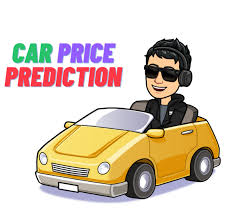

# **About Dataset**
**Main Context:-**

As a vehicle salesperson, you would like to create a model that can estimate the overall amount that consumers would spend given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth

## **The model should anticipate the following (Problem Statement):**

**Amount Paid for a Car**

## **Task type:**
Regression

## **Algorithm:**
The given problem statement can be solved using Machine Learning or Deep Learning Techniques




# **Step 1: Import Libraries**
We need libraries for data manipulation, preprocessing, and building the ANN.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# **Step 2: Load and Preprocess the Dataset**
**1. Drop unnecessary columns:** Remove irrelevant columns like customer name and customer e-mail.

**2. Encode categorical data:** Convert the country column into numerical form using one-hot encoding.

**3. Normalize numerical features:** Use Min-Max Scaling to scale features between 0 and 1 for better ANN performance.

In [3]:
# Load dataset
data = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

# Drop unnecessary columns
data_cleaned = data.drop(['customer name', 'customer e-mail'], axis=1)

# One-hot encode the 'country' column
data_encoded = pd.get_dummies(data_cleaned, columns=['country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('car purchase amount', axis=1)
y = data_encoded['car purchase amount']

# Normalize features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# **Step 3: Split Data into Training and Testing Sets**
We split the data into training and testing sets to evaluate the model's performance on unseen data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Step 4: Define the ANN Architecture**
1. **Input Layer:** Matches the number of features in X_train.

2. **Hidden Layers:** Add dense layers with ReLU activation to learn complex patterns.

3. **Output Layer:** A single neuron with linear activation for regression.

In [5]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input and first hidden layer
    Dense(64, activation='relu'),                              # Second hidden layer
    Dense(1, activation='linear')                              # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Step 5: Compile the Model**
## Define:

* **Optimizer:** Adam optimizer for adaptive learning rates.

* **Loss Function:** Mean Squared Error for regression.

* **Metrics:** Mean Absolute Error for evaluation.

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


# **Step 6: Train the Model**
 Using a validation split to monitor performance during training.

In [7]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2037523584.0000 - mean_absolute_error: 43843.8633 - val_loss: 1938659072.0000 - val_mean_absolute_error: 42925.1875
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2025899904.0000 - mean_absolute_error: 43572.5664 - val_loss: 1938570240.0000 - val_mean_absolute_error: 42924.1641
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2073142272.0000 - mean_absolute_error: 44233.6953 - val_loss: 1938420096.0000 - val_mean_absolute_error: 42922.4453
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2067689344.0000 - mean_absolute_error: 44184.2852 - val_loss: 1938157952.0000 - val_mean_absolute_error: 42919.4375
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2045832064.0000 - mean_absolute_error: 43960.4297 - val_loss: 1937726208.0000 - val_mean_absolute_error: 42914.4844
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2108952192.0000 - mean_absolute_error: 44627.7383 - val_loss: 193705369

# **Step 7: Evaluate the Model**
Test the model on the unseen test set and calculate performance metrics.

In [8]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1026221440.0000 - mean_absolute_error: 30445.4863  
Test Loss: 986135488.0, Test MAE: 29818.955078125


# **Step 8: Make Predictions**
Use the trained model to predict car sale prices for the test set.

In [9]:
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


# **Step 9: Visualize Training Performance**
Plot loss and metrics over epochs to evaluate training and validation performance.

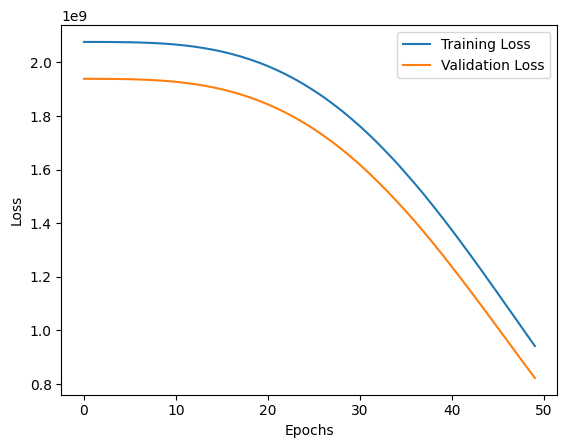

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Model Performance**
Both the training loss and validation loss are steadily decreasing over epochs, it indicates that the model is learning effectively and generalizing well to the unseen validation data. Here's a detailed breakdown of what this means:

* **Training Loss:**

* The model is improving its ability to predict the target variable (car sale price) on the training data.

* A consistent decrease in training loss means the model is successfully identifying patterns and minimizing errors in the training dataset.

* **Validation Loss:**

* The model is not just memorizing the training data but is also performing better on the unseen validation data.

* This indicates that the model is generalizing well, which is essential for its performance on test data.

**Why This is Good**

1. **No Overfitting:** Validation loss decreases along with training loss, it means the model is not overfitting to the training data. Overfitting occurs when the model performs well on training data but poorly on validation or test data.

2. **Convergence:**
 The decreasing loss suggests that the optimizer is effectively adjusting the model weights and biases to minimize the error.
